<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Kim/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns

In [20]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
data = pd.read_csv("coin_Bitcoin.csv")

In [ ]:
#understanding the data

data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [ ]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2626,2627,Dogecoin,DOGE,2021-02-23 23:59:59,0.053768,0.042410,0.053698,0.047392,2.394345e+09,6.089686e+09
2627,2628,Dogecoin,DOGE,2021-02-24 23:59:59,0.059873,0.046216,0.047414,0.056555,4.148512e+09,7.267918e+09
2628,2629,Dogecoin,DOGE,2021-02-25 23:59:59,0.057808,0.049869,0.056615,0.050167,2.356982e+09,6.447665e+09
2629,2630,Dogecoin,DOGE,2021-02-26 23:59:59,0.052472,0.048708,0.050138,0.050480,1.694323e+09,6.488523e+09
2630,2631,Dogecoin,DOGE,2021-02-27 23:59:59,0.051920,0.049297,0.050500,0.050083,1.286230e+09,6.438193e+09


In [ ]:
data.describe() 

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2.031000e+03,2.031000e+03
mean,1016.000000,267.068034,246.986450,257.490557,258.142275,5.429599e+09,2.698656e+10
std,586.443518,322.096221,292.253460,308.347903,309.321155,8.100359e+09,3.347336e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,508.500000,13.221850,12.515050,12.858200,12.866100,2.848855e+07,1.086243e+09
50%,1016.000000,189.088865,180.317159,184.943356,185.028722,1.844270e+09,1.972963e+10
75%,1523.500000,342.238919,317.625992,332.716492,333.370499,7.944177e+09,3.280357e+10
max,2031.000000,2036.286493,1896.684508,1959.902977,1960.164744,6.073363e+10,2.249103e+11


In [ ]:
data.shape #to check the shape of the data for bitcoin 

(2862, 10)

In [ ]:
data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [ ]:
data.nunique() #displays the unique values 

SNo          2862
Name            1
Symbol          1
Date         2862
High         2852
Low          2856
Open         2855
Close        2849
Volume       2621
Marketcap    2861
dtype: int64

In [ ]:
data['Marketcap'].unique()  #looking for specific unique value

array([1.60376886e+09, 1.54281312e+09, 1.29895459e+09, ...,
       8.77766126e+11, 8.63752275e+11, 8.60978135e+11])

In [ ]:
#cleaning the data 

In [ ]:
data.isnull().sum() #checking null values in the dataset 

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [16]:
crypto = 'DOGE'
currency = 'USD'

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [17]:
data.index = pd.to_datetime(data.index)

In [18]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,0.000186,0.000182,0.000186,0.000183,3.069130e+05,0.000183
2015-01-02,0.000187,0.000182,0.000183,0.000186,3.560170e+05,0.000186
2015-01-03,0.000186,0.000167,0.000184,0.000167,2.855740e+05,0.000167
2015-01-04,0.000169,0.000155,0.000168,0.000158,3.791500e+05,0.000158
2015-01-05,0.000166,0.000157,0.000159,0.000161,5.745520e+05,0.000161
...,...,...,...,...,...,...
2021-06-22,0.247110,0.180979,0.190671,0.232174,5.098675e+09,0.232174
2021-06-23,0.268690,0.222527,0.234970,0.262782,3.844648e+09,0.262782
2021-06-24,0.289145,0.230006,0.263480,0.239153,5.542163e+09,0.239153


In [22]:
#preparing the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [34]:
pred_days = 30 # number of days for the prediction

In [24]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [39]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

ValueError: ignored

In [40]:
test_start = dt.datetime(2021,6,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [41]:
test_data.index = pd.to_datetime(test_data.index)

In [44]:
test_data #displaying the current data until the exact date provided 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-31,0.383079,0.312360,0.325744,0.370077,5.796031e+09,0.370077
2021-06-01,0.444590,0.352588,0.370302,0.423374,1.142559e+10,0.423374
2021-06-02,0.440763,0.378819,0.423739,0.399963,6.809900e+09,0.399963
2021-06-03,0.400982,0.351442,0.400982,0.376323,5.889983e+09,0.376323
2021-06-04,0.393886,0.360488,0.376752,0.372177,3.464039e+09,0.372177
2021-06-05,0.376798,0.367254,0.371676,0.371807,1.836611e+09,0.371807
2021-06-06,0.379678,0.329806,0.371566,0.331050,3.043975e+09,0.331050
2021-06-07,0.341435,0.296660,0.331822,0.327687,3.918488e+09,0.327687
2021-06-08,0.353762,0.313131,0.326423,0.343331,3.154333e+09,0.343331


In [45]:
actual_prices = test_data['Close']

In [46]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.37007701, 0.423374  , 0.39996299, 0.37632301, 0.372177  ,
       0.37180701, 0.33105001, 0.327687  , 0.34333101, 0.32635099,
       0.319359  , 0.31208399, 0.32438201, 0.33208501, 0.328381  ,
       0.30776101, 0.30649599, 0.29347199, 0.28735599, 0.2809    ,
       0.178691  , 0.19103099, 0.23217399, 0.26278201, 0.239153  ,
       0.244784  , 0.25947195])

In [47]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [48]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [49]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [53]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [54]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

ValueError: ignored

ValueError: ignored

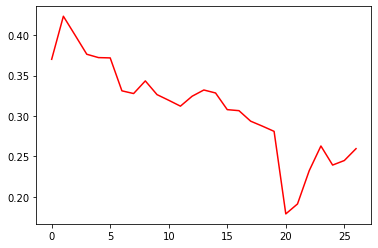

In [55]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()